In [1]:
import interpretdl as it

# SG and Evalaution

W0301 21:25:52.174105 23020 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.2, Runtime API Version: 10.2
W0301 21:25:52.179473 23020 device_context.cc:465] device: 0, cuDNN Version: 7.6.
/root/codespace/InterpretDL/interpretdl/interpreter/abc_interpreter.py:83: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda, **kwargs)
/opt/conda/envs/pp2/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:392: UserWarning: 
tensor.grad will return the tensor value of the gradient. This is an incompatible upgrade for tensor.grad API.  It's return type changes from numpy.ndarray in version 2.0 to paddle.Tensor in version 2.1.0.  If you want to get the numpy value of the gradient, you can use :code:`x.grad.numpy()` 
  warnings.warn(warning_msg)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████

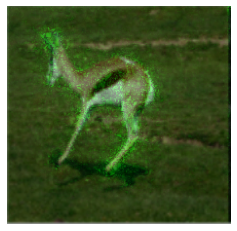

In [2]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
sg = it.SmoothGradInterpreter(paddle_model, use_cuda=True)
exp = sg.interpret(
        img_path, 
        noise_amount=0.1,
        visual=True, 
        labels=None, 
        save_path=None)

In [3]:
evaluator = it.Pertubation(paddle_model, 'gpu:0')
r = evaluator.evaluate(img_path, exp)

# LIME and Evaluation

W0301 21:31:50.705217 24315 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.2, Runtime API Version: 10.2
W0301 21:31:50.710744 24315 device_context.cc:465] device: 0, cuDNN Version: 7.6.
/root/codespace/InterpretDL/interpretdl/interpreter/abc_interpreter.py:175: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda, **kwargs)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:13<00:00, 148.34it/s]


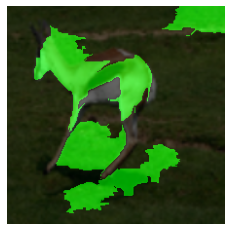

In [2]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
lime = it.LIMECVInterpreter(paddle_model, use_cuda=True)
lime_weights = lime.interpret(
    img_path,
    num_samples=2000,
    batch_size=50,
    visual=True,
    save_path=None
)

In [3]:
evaluator = it.Pertubation(paddle_model, 'gpu:0')
r = evaluator.evaluate(img_path, lime.lime_results)

# Plots

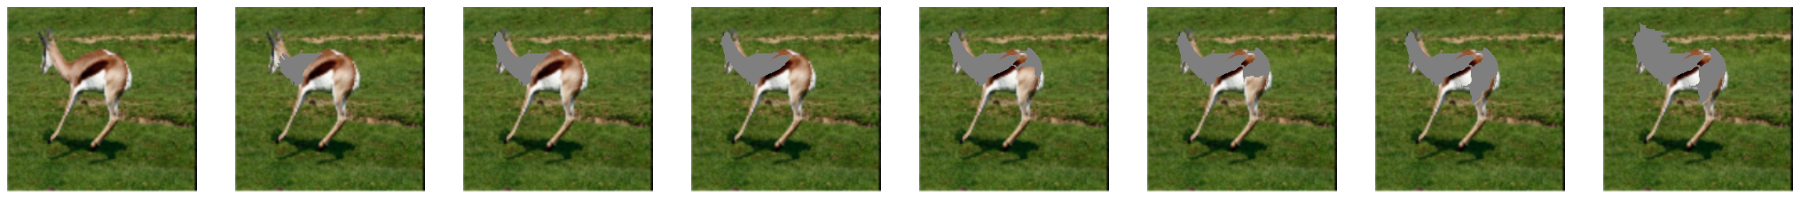

In [4]:
import matplotlib.pyplot as plt

psize = 4
show_images = 8
cols = show_images
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['MoRF_images'][:show_images]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

Text(0, 0.5, 'Probability')

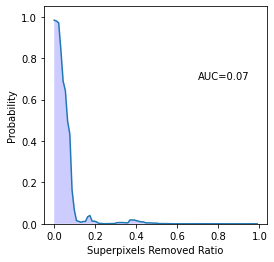

In [5]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(np.arange(len(r['MoRF_probas'])) / len(r['MoRF_probas']), r['MoRF_probas'])
ax.text(0.7, 0.7, f"AUC={np.mean(r['MoRF_probas']):.2f}")
ax.fill_between(x = np.arange(len(r['MoRF_probas'])) / len(r['MoRF_probas']),
                 y1 = 0,
                 y2 = r['MoRF_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
ax.set_ylim((0, 1.05))
ax.set_xlabel('Superpixels Removed Ratio')
ax.set_ylabel('Probability')

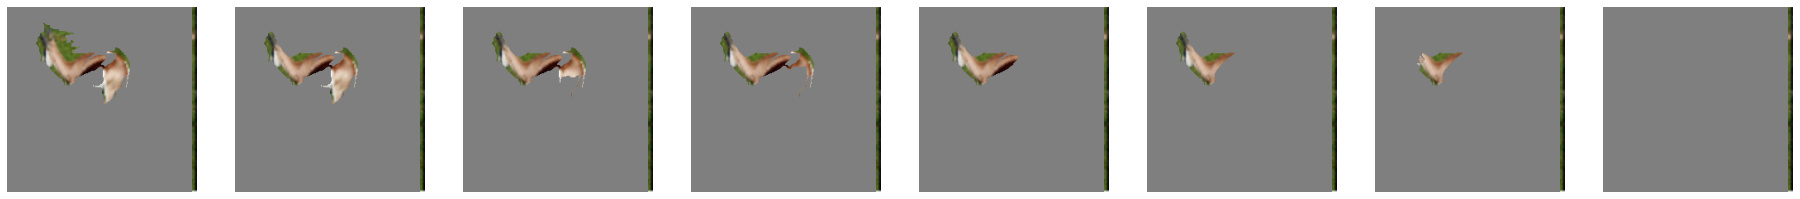

In [8]:
import matplotlib.pyplot as plt

psize = 4
show_images = 8
cols = show_images
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
for axis, img in zip(ax, r['LeRF_images'][-show_images:]):
    axis.axis('off')
    axis.imshow(img)
    
plt.show()

Text(0, 0.5, 'Probability')

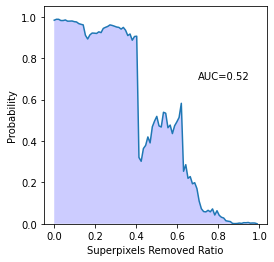

In [9]:
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(np.arange(len(r['LeRF_probas'])) / len(r['LeRF_probas']), r['LeRF_probas'])
ax.text(0.7, 0.7, f"AUC={np.mean(r['LeRF_probas']):.2f}")
ax.fill_between(x = np.arange(len(r['LeRF_probas'])) / len(r['LeRF_probas']),
                 y1 = 0,
                 y2 = r['LeRF_probas'],
                 alpha = 0.2,
                 facecolor = 'blue')
ax.set_ylim((0, 1.05))
ax.set_xlabel('Superpixels Removed Ratio')
ax.set_ylabel('Probability')